In [7]:
import myutils.load_images

In [8]:
import myutils.check_keras_gpu

In [17]:
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K

np.random.seed(1337)

In [4]:
# Set some parameters
in_height = 64
in_width = 64
out_height = 256
out_width = 256
color_dim = 3
path_in = '/home/Matthew/image-super-resolution/data/imagenet/10k/res64/'
path_out = '/home/Matthew/image-super-resolution/data/imagenet/10k/res256/'

In [6]:
X_train,X_test,y_train,y_test = load_images(path_in, path_out, .2)

Stage 0
Stage 1000
Stage 2000
Stage 3000
Stage 4000
Stage 5000
Stage 6000
Stage 7000
Stage 8000
Stage 9000


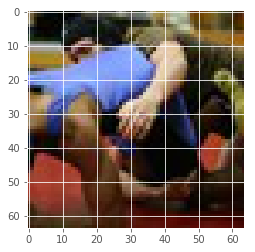

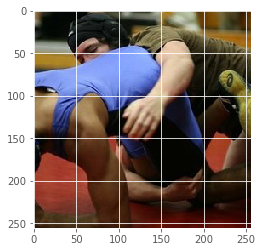

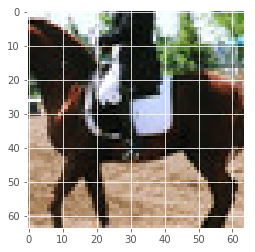

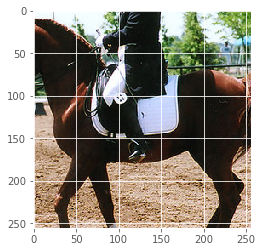

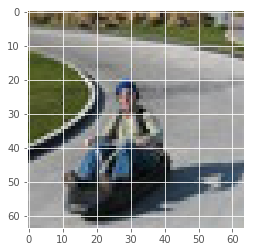

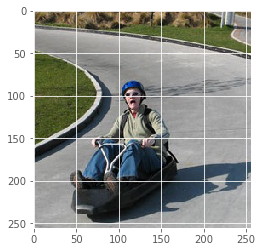

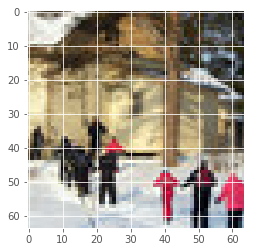

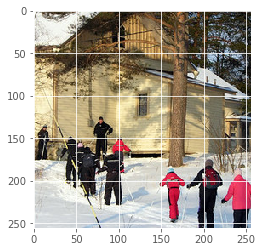

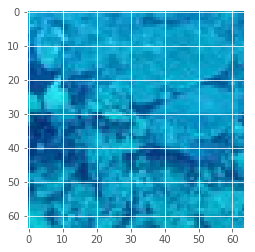

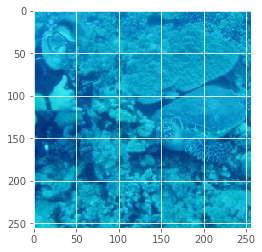

In [8]:
PrintRandomImages(X_train,y_train,5,42)

In [51]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras import backend as K
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from keras.optimizers import RMSprop

In [52]:
model = Sequential()
inputShape = (in_height, in_width, color_dim)

#encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape = inputShape)) # 64 x 64 x 32)
model.add(MaxPooling2D(pool_size=(2, 2))) # 32 x 32 x 32
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) #32 x 32 x 64
model.add(MaxPooling2D(pool_size=(2, 2))) # 16 x 16 x 64
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 16 x 16 x 128 (small and thick)

#decoder
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 16 x 16 x 128
model.add(UpSampling2D((2,2))) # 32 x 32 x 128
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # 32 x 32 x 64
model.add(UpSampling2D((2,2))) # 64 x 64 x 64
#decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
#return decoded
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) # 64 x 64 x 32
model.add(UpSampling2D((2,2))) # 128 x 128 x 32
model.add(Conv2D(16, (3, 3), activation='relu', padding='same')) # 128 x 128 x 16
model.add(UpSampling2D((2,2))) # 256 x 256 x 16
model.add(Conv2D(8, (3, 3), activation='relu', padding='same')) # 256 x 256 x 8
model.add(Conv2D(3, (3, 3), activation='relu', padding='same')) # 256 x 256 x 3


In [53]:
model.compile(loss='mean_squared_error', optimizer = RMSprop())

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 32, 32, 128)       0         
__________

In [55]:
batch_size = 128
epochs = 50

trainHistory = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 63s 8ms/step - loss: 0.2802 - val_loss: 0.0771
Epoch 2/50
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0579 - val_loss: 0.0487
Epoch 3/50
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0431 - val_loss: 0.0663
Epoch 4/50
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0337 - val_loss: 0.0695
Epoch 5/50
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0300 - val_loss: 0.0249
Epoch 6/50
8000/8000 [==============================] - 47s 6ms/step - loss: 0.0263 - val_loss: 0.0284
Epoch 7/50
8000/8000 [==============================] - 47s 6ms/step - loss: 0.0239 - val_loss: 0.0209
Epoch 8/50
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0227 - val_loss: 0.0286
Epoch 9/50
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0209 - val_loss: 0.0236
Epoch 10/50
8000/8000 [==

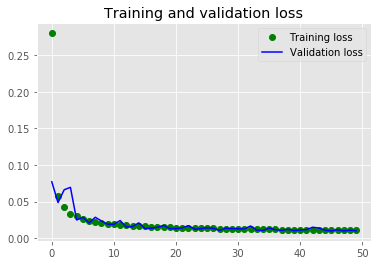

In [62]:
loss = trainHistory.history['loss']
val_loss = trainHistory.history['val_loss']
#epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',color='g')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [60]:
epochs

range(0, 50)

In [65]:
#predicting (overfit)

In [64]:
pred = model.predict(X_test)

In [71]:
pred.shape

(2000, 256, 256, 3)

In [ ]:
plt.figure(figsize=(256, 256))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i])
    curr_lbl = y_test[i]
    #plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(256, 256))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i])  
plt.show()

Test Images


In [42]:
'''# initialize the model
model = Sequential()
inputShape = (in_height, in_width, color_dim)

''if K.image_data_format() == "channels_first":
    print('Channels first')
    inputShape = (color_dim, in_height, in_width)
 
# the entire SRCNN architecture consists of three CONV => RELU layers with *no* zero-padding
model.add(Conv2D(64, (9, 9), activation='relu', input_shape=inputShape))
model.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer="he_normal"))
model.add(Conv2D(color_dim, (5, 5), activation='relu', kernel_initializer="he_normal"))'''''

In [43]:
'''opt = Adam(lr=0.001, decay=0.001 / 10)
model.compile(loss="mse", optimizer=opt)'''

In [11]:
'''
with open('res50t0res250.pickle', 'wb') as handle:
    pickle.dump((X_train,X_test,y_train,y_test), handle, protocol=pickle.HIGHEST_PROTOCOL)'''

"\nwith open('res50t0res250.pickle', 'wb') as handle:\n    pickle.dump((X_train,X_test,y_train,y_test), handle, protocol=pickle.HIGHEST_PROTOCOL)"

In [12]:
'''with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

print a == b'''

"with open('filename.pickle', 'rb') as handle:\n    b = pickle.load(handle)\n\nprint a == b"